# Evaluating the models on out-sample data

This notebook can be used to load and evaluate the pretrained models on an arbitrary set of videos.

In [1]:
%matplotlib inline
import warnings
import json
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import torch

from src.util import predict_files, initialize_model, get_model_path

warnings.filterwarnings("ignore")

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

## Configuration

In the next cell we specify which model we want to evaluate. 
Available models are:

**Image-based:** 
1. MesoNet4 
2. EfficientNet B3

**Video-based:**

3. MesoNet4 + LSTM
4. EfficientNet B0 + LSTM


Next to this we want to choose whether to use a model trained on either clean data or data augmented using perturbations.

In [3]:
# init model

model = 1             # choose model type
checkpoint = 23       # pick up training from checkpoint 

# define model name to be evaluated
model_name = "meso4test_do0.5_wd0.0001_lr0.0001_dataclean"

# get model_class for init, get logging dir for model 
model_class, log_dir = get_model_path(model, model_name, pretrained=True) 

# training can be picked up from any epoch. if pretrained is set to True, an epoch must be specified
model, temporal = initialize_model(model_class, log_dir, pretrained=True,
                                   epoch=checkpoint, device=device)
model.to(device)

MesoNet4(
  (convs): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (9): ReLU()
    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (13): ReLU()
    (14): BatchNorm2d(16, eps=1e-05, mo

## Data

Next, specify the path to data. In the data folder, there must be two subfolders, named 'real' and 'fake', holding the respective instances of pristine or manipulated videos.
Also, number of frames used for each video can be changes. NOTE: Using less than 5 frames for temporal models is not possible.

In [4]:
file_path = f'data/{"temporal" if temporal else "nontemp"}/testfiles/'
n_frames = 8

Label: fake
Fake prob: 0.7978965044021606


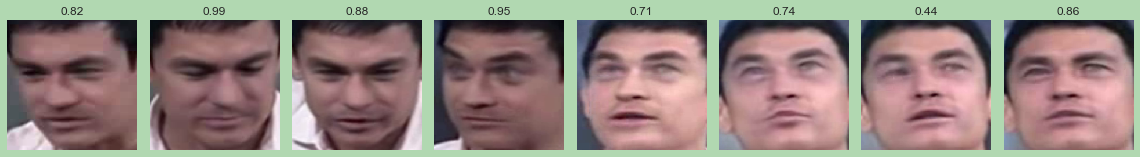

Label: fake
Fake prob: 0.812471866607666


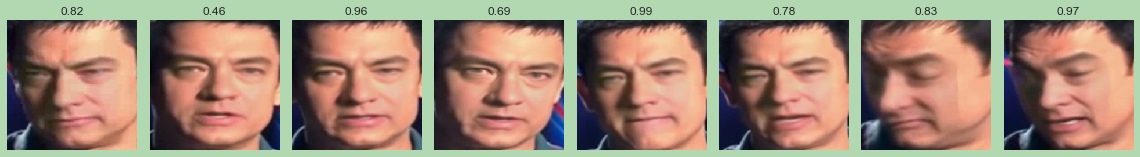

Label: fake
Fake prob: 0.9915866851806641


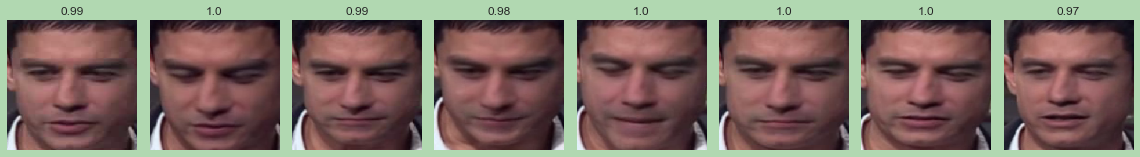

Label: fake
Fake prob: 0.9533358216285706


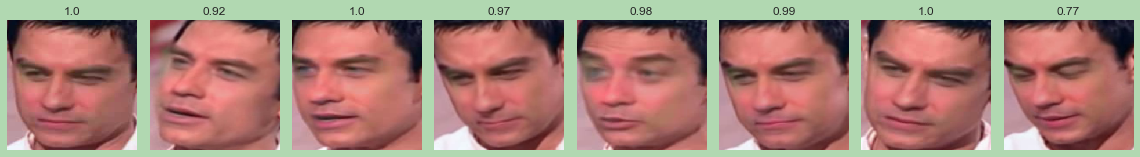

Label: fake
Fake prob: 0.932089626789093


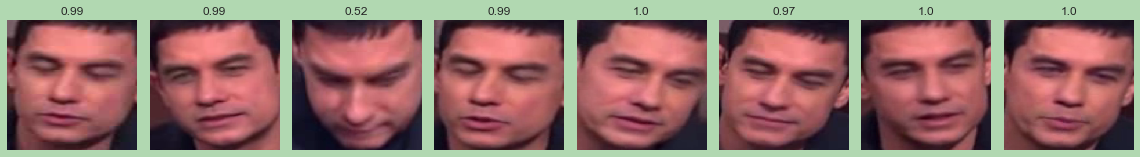

Label: fake
Fake prob: 0.694548487663269


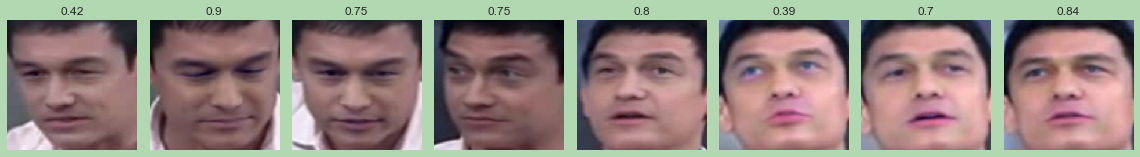

Label: fake
Fake prob: 0.8429036140441895


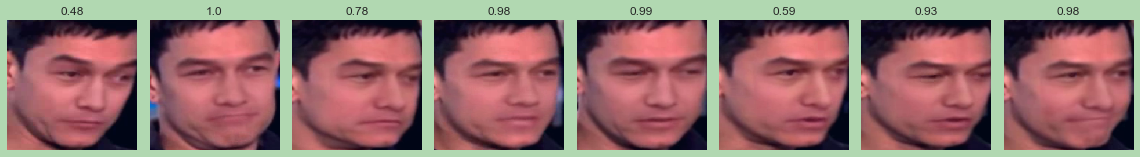

Label: fake
Fake prob: 0.9523800611495972


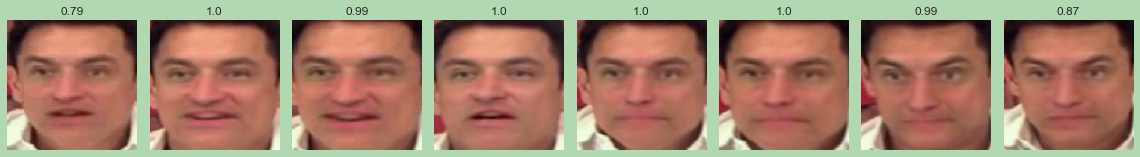

Label: fake
Fake prob: 0.8349102735519409


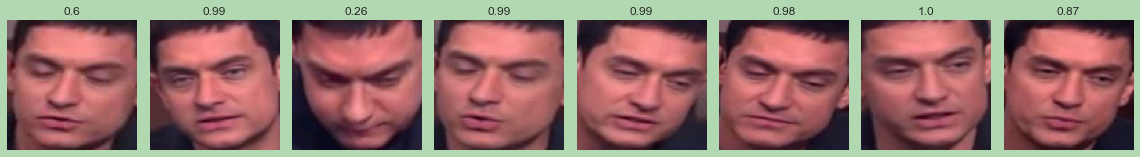

Label: fake
Fake prob: 0.3923906087875366


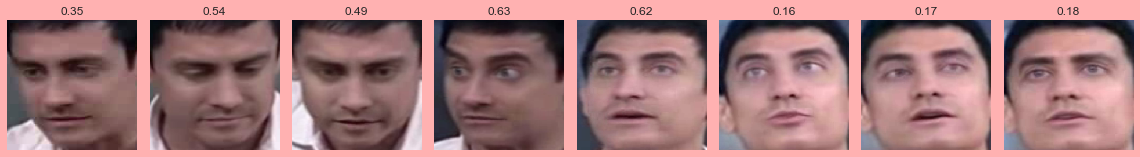

Label: fake
Fake prob: 0.4017762243747711


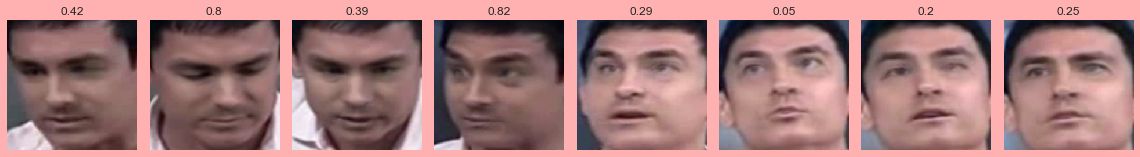

Label: fake
Fake prob: 0.9582874774932861


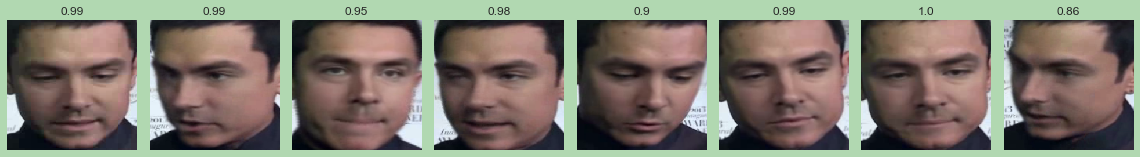

Label: fake
Fake prob: 0.8455624580383301


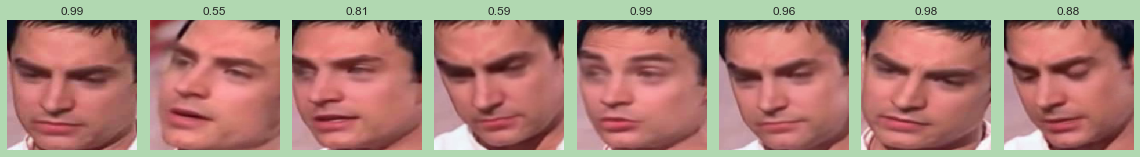

Label: fake
Fake prob: 0.8364756107330322


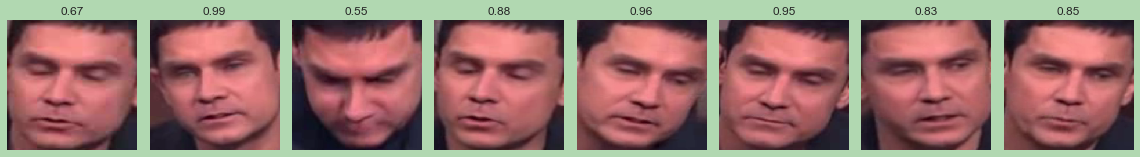

Label: fake
Fake prob: 0.620956301689148


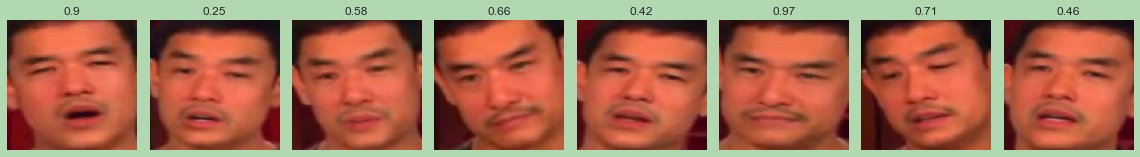

Label: fake
Fake prob: 0.8112044334411621


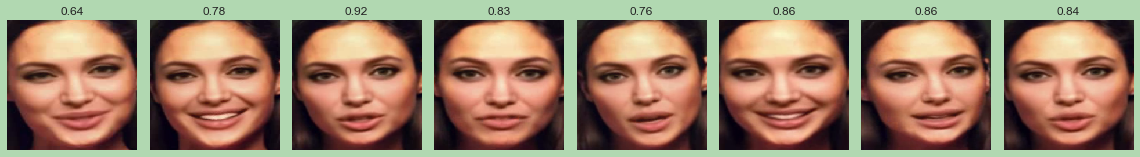

Label: fake
Fake prob: 0.5856077075004578


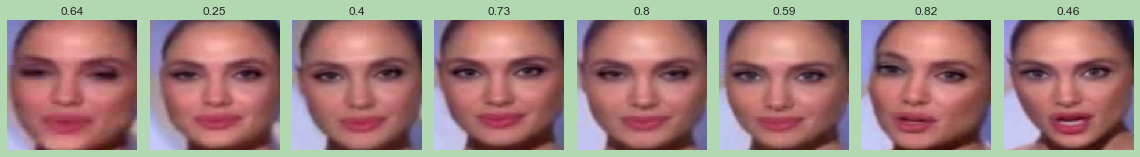

Label: fake
Fake prob: 0.879993200302124


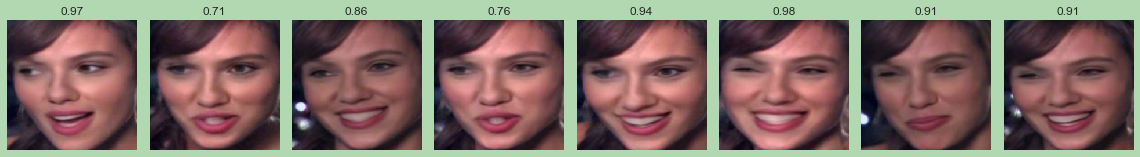

Label: fake
Fake prob: 0.8107184171676636


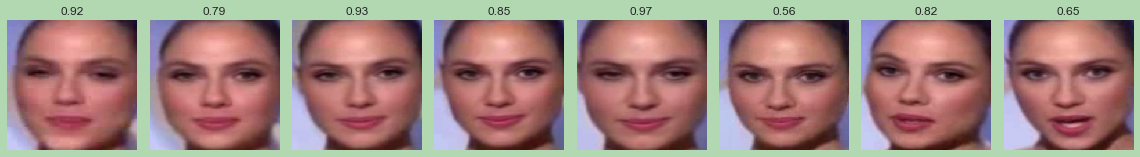

Label: fake
Fake prob: 0.7370813488960266


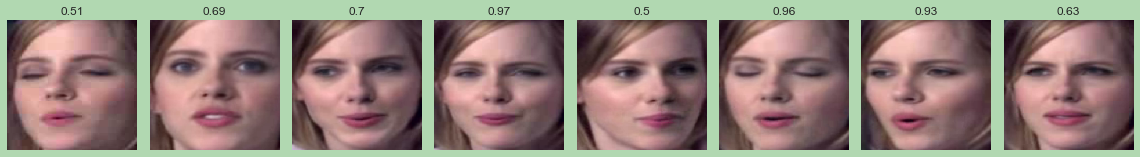

Label: fake
Fake prob: 0.6625665426254272


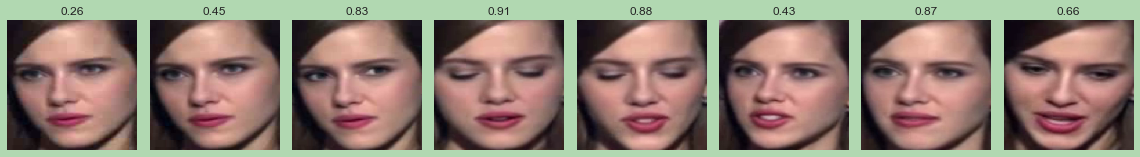

Label: fake
Fake prob: 0.6171060800552368


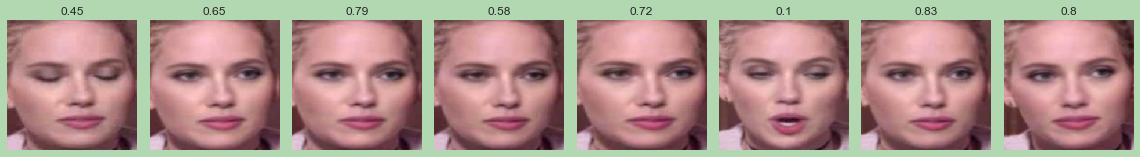

Label: fake
Fake prob: 0.5337375998497009


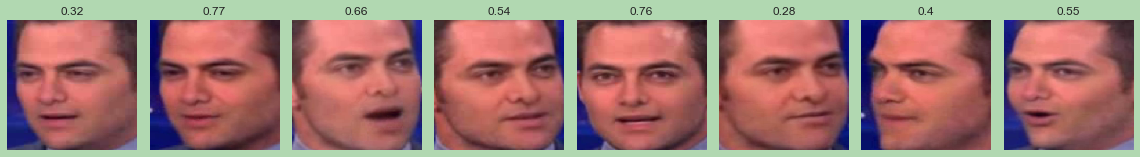

Label: fake
Fake prob: 0.6458687782287598


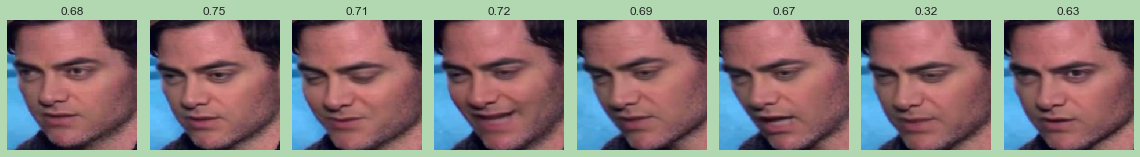

Label: fake
Fake prob: 0.9372701644897461


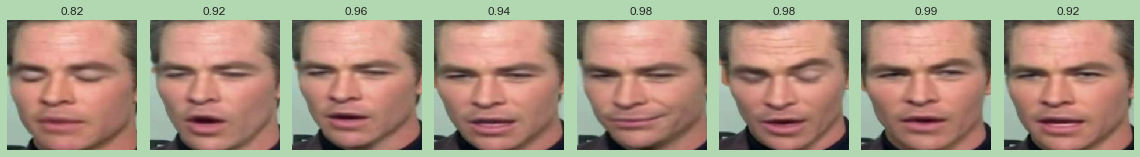

Label: fake
Fake prob: 0.7657136917114258


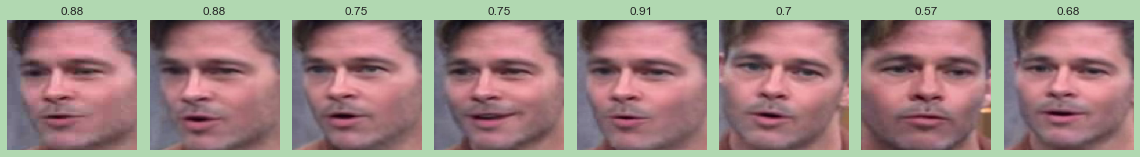

Label: fake
Fake prob: 0.9972262382507324


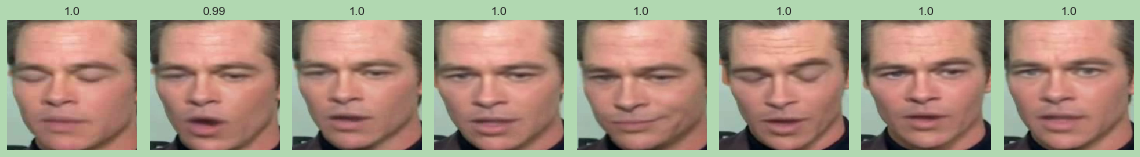

Label: fake
Fake prob: 0.9607136249542236


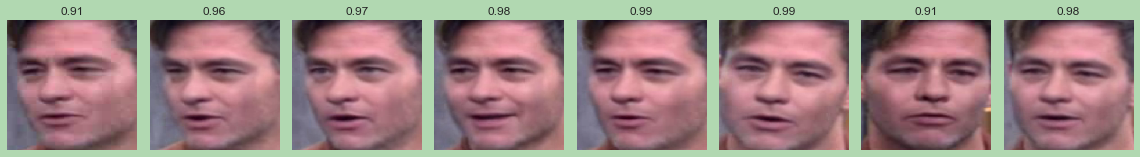

Label: fake
Fake prob: 0.6141971349716187


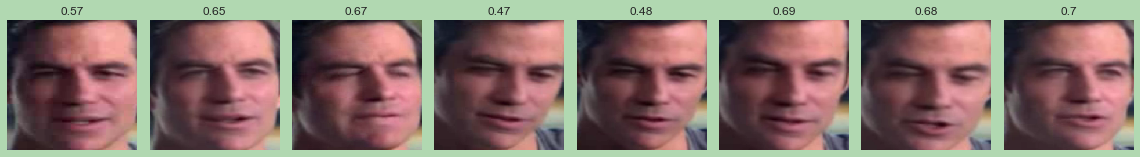

Label: fake
Fake prob: 0.4779525101184845


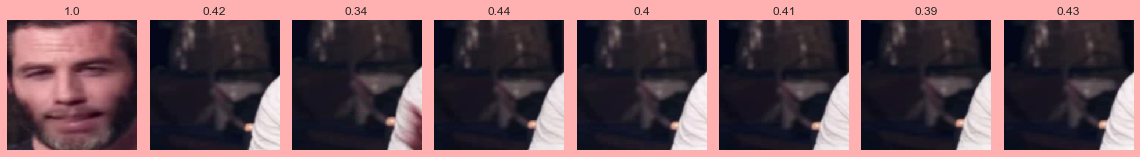

Label: fake
Fake prob: 0.8598013520240784


KeyboardInterrupt: 

<Figure size 1152x288 with 0 Axes>

In [5]:
predict_files(model=model,
              path=file_path,
              n_frames=n_frames,
              device=device,
              agg='mean',
              temporal=temporal,
              plot_ims=True,
              threshold=None,
              verbose=True,
              log_metrics=False)


